# 주택가격 회귀 분석

In [2]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
# 머신러닝 패키지 sklearn 설치
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=bacaffa7809bc080cec5346c78ca9445896b02586075bfa4ef345facd70a3eb4
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


## 데이터 수집

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

## 데이터 준비 및 탐색

In [5]:
boston =  load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
print('보스톤 주택 가격 데이터셋 크기 : ', boston_df.shape)

보스톤 주택 가격 데이터셋 크기 :  (506, 14)


In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 분석 모델 구축
- 트레인 데이터, 테스트 데이터 분리해서 4개를 만들어주세요

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# X, Y 분할하기
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [13]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [14]:
# 선형회귀분석 : 모델 객체 생성
lr = LinearRegression()

In [23]:
# 선형회귀분석 : 모델 훈련 (공부시키고)
lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [25]:
Y_predict[:5]

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641])

In [26]:
Y_test

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
       ... 
393    13.8
325    24.6
53     23.4
401     7.2
178    29.9
Name: PRICE, Length: 152, dtype: float64

## 결과 분석 및 시각화

In [28]:
# 정확도 계산
mse = mean_squared_error(Y_test, Y_predict)
mse

17.296915907902164

In [29]:
rmse = np.sqrt(mse)
rmse

4.158956107955717

In [37]:
# 절편과 회귀계수를 찍어보자
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  40.99559517216454
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [38]:
np.round(lr.coef_, 1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [35]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [39]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef

CRIM       -0.11
ZN          0.07
INDUS       0.03
CHAS        3.05
NOX       -19.80
RM          3.35
AGE         0.01
DIS        -1.74
RAD         0.36
TAX        -0.01
PTRATIO    -0.92
B           0.01
LSTAT      -0.57
dtype: float64

In [41]:
coef.sort_values()

NOX       -19.80
DIS        -1.74
PTRATIO    -0.92
LSTAT      -0.57
CRIM       -0.11
TAX        -0.01
AGE         0.01
B           0.01
INDUS       0.03
ZN          0.07
RAD         0.36
CHAS        3.05
RM          3.35
dtype: float64

In [42]:
# 내림차순으로 정리해볼까
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [43]:
coef.sort_index()

AGE         0.01
B           0.01
CHAS        3.05
CRIM       -0.11
DIS        -1.74
INDUS       0.03
LSTAT      -0.57
NOX       -19.80
PTRATIO    -0.92
RAD         0.36
RM          3.35
TAX        -0.01
ZN          0.07
dtype: float64

In [44]:
coef.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [45]:
coef.values

array([-1.10e-01,  7.00e-02,  3.00e-02,  3.05e+00, -1.98e+01,  3.35e+00,
        1.00e-02, -1.74e+00,  3.60e-01, -1.00e-02, -9.20e-01,  1.00e-02,
       -5.70e-01])

## 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

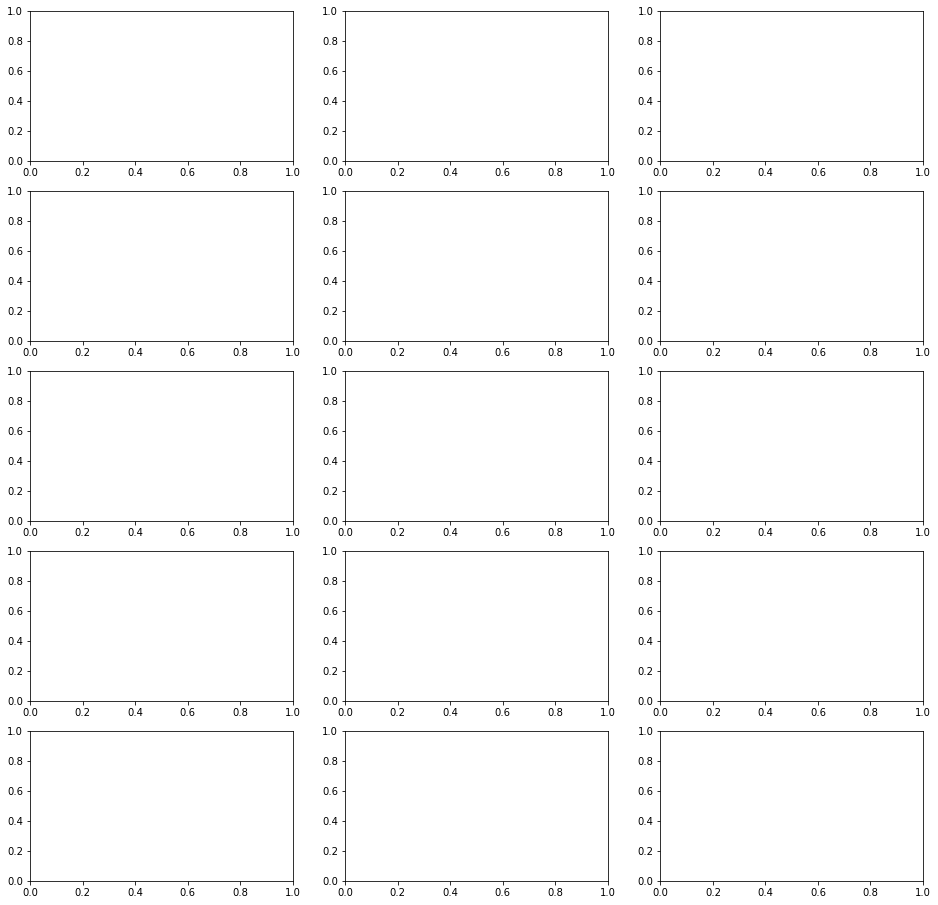

In [49]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

In [50]:
X_train.columns.to_list()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [51]:
x_features = X_train.columns.to_list()
x_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [56]:
for i, feature in enumerate(x_features):
    print("i: ", i)
    row = int(i / 3)
    col = i % 3
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax = axs[row][col])

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12


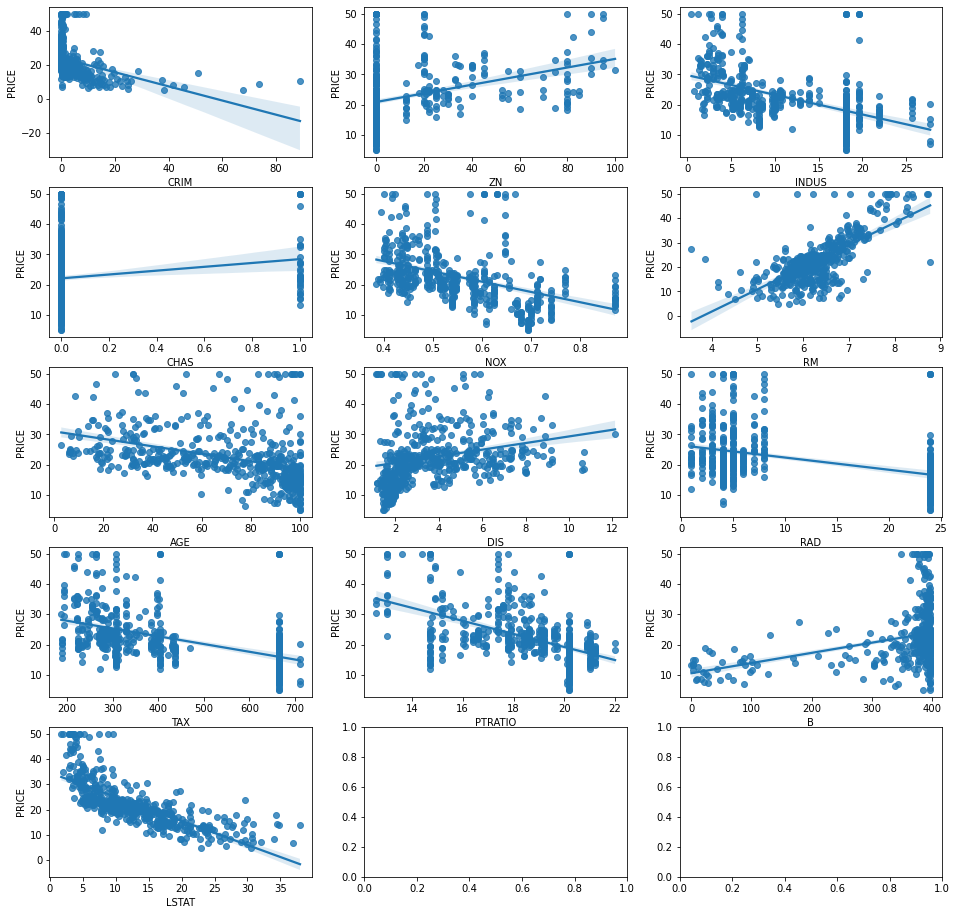

In [58]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)
for i, feature in enumerate(x_features):
#     print("i: ", i)
    row = int(i / 3)
    col = i % 3
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax = axs[row][col])

In [59]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [65]:
lr.predict([[0.001, 15, 1, 0, 0.59, 5, 10, 0, 1, 10, 5, 100, 1]])

array([43.25278829])

In [66]:
train_predict = lr.predict(X_train)

In [69]:
r2_score(Y_train, train_predict)

0.7273505005599823

In [73]:
mse = mean_squared_error(Y_train, train_predict)
mse

24.42999235657573

In [74]:
rmse = np.sqrt(mse)
rmse

4.942670569295078

In [80]:
one_person = input(x_features)
one_person

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']0.001, 15, 1, 0, 0.59, 5, 10, 0, 1, 10, 5, 100, 1


'0.001, 15, 1, 0, 0.59, 5, 10, 0, 1, 10, 5, 100, 1'

In [81]:
data = one_person.split(',')
data2 = []
for one in data :
    data2.append(float(one))
data2

[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]

In [82]:
use_data = [data2]
use_data

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [83]:
lr.predict(use_data)

array([43.25278829])

In [85]:
CRIM = input('CRIM >> ')
ZN = input('ZN >> ')
INDUS = input('INDUS >> ')
CHAS = input('CHAS >> ')
NOX = input('NOX >> ')
RM = input('RM >> ')
AGE = input('AGE >> ')
DIS = input('DIS >> ')
RAD = input('RAD >> ')
TAX = input('TAX >> ')
PTRATIO = input('PTRATIO >> ')
B = input('B >> ')
LSTAT = input('LSTAT >>')

CRIM >> 0.001
ZN >> 15.0
INDUS >> 1.0
CHAS >> 0.0
NOX >> 0.59
RM >> 5.0
AGE >> 10.0
DIS >> 0.0
RAD >> 1.0
TAX >> 10.0
PTRATIO >> 5.0
B >> 100.0
LSTAT >>1.0


In [86]:
data_list = [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
data_list
len(data_list)

13

In [88]:
# float으로 변환하여 2차원으로 변형하여 predict
data_list2 = [list(map(lambda x : float(x), data_list))]
data_list2

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [89]:
lr.predict(use_data)

array([43.25278829])

In [90]:
lambda x : float(x), data_list

(<function __main__.<lambda>(x)>,
 ['0.001',
  '15.0',
  '1.0',
  '0.0',
  '0.59',
  '5.0',
  '10.0',
  '0.0',
  '1.0',
  '10.0',
  '5.0',
  '100.0',
  '1.0'])

In [91]:
map(lambda x : float(x), data_list)

In [93]:
cast_list = [list(map(lambda x : float(x), data_list))]
cast_list

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [94]:
lr.predict(cast_list)

array([43.25278829])